# Compute Drawdowns

<AxesSubplot:>

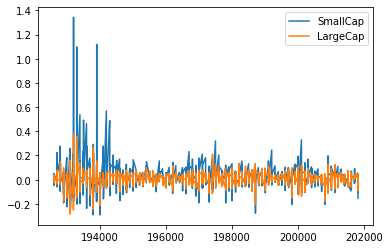

In [4]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.9)
rets = me_m[['Lo 10','Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [5]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [6]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [8]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [9]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [11]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [13]:
rets.loc["1975"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [14]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [15]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Computer Drawdowns
1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [18]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod() #value of portfolio as it compounds over time

In [19]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

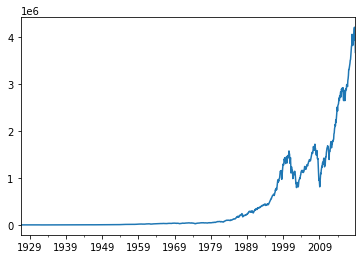

In [20]:
wealth_index.plot.line()

In [21]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

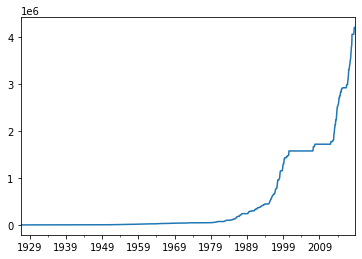

In [22]:
previous_peaks.plot()

<AxesSubplot:>

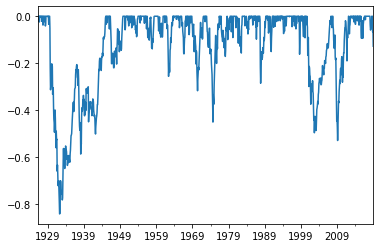

In [23]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [24]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [25]:
drawdown.min()

-0.8400375277943123

In [27]:
drawdown["1975":].min()

-0.5280945042309304

In [29]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [30]:
drawdown.idxmin()

Period('1932-05', 'M')

In [33]:
def drawdown(return_series: pd.Series): 
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    The wealth index
    The previous peaks
    Percent drawdowns
    """
    wealth_index = 100*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdowns
    })


In [34]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,103.290000,103.290000,0.0000
1926-08,107.111730,107.111730,0.0000
1926-09,107.829379,107.829379,0.0000
1926-10,105.209125,107.829379,-0.0243
1926-11,108.049771,108.049771,0.0000


In [36]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,103.290000,103.290000
1926-08,107.111730,107.111730
1926-09,107.829379,107.829379
1926-10,105.209125,107.829379
1926-11,108.049771,108.049771


<AxesSubplot:>

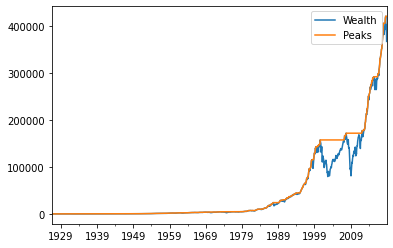

In [37]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

<AxesSubplot:>

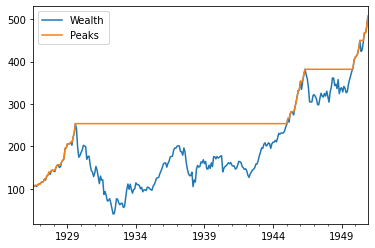

In [38]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

In [41]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,103.290000,103.290000,0.0000
1926-08,107.111730,107.111730,0.0000
1926-09,107.829379,107.829379,0.0000
1926-10,105.209125,107.829379,-0.0243
1926-11,108.049771,108.049771,0.0000


In [43]:
drawdown(rets["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [44]:
drawdown(rets["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [45]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [46]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [48]:
drawdown(rets["1940":]["SmallCap"])["Drawdown"].min()

-0.7000596091967917

In [54]:
drawdown(rets["1940":]["SmallCap"])["Drawdown"].idxmin()

Period('1974-12', 'M')

In [55]:
drawdown(rets["1940":]["LargeCap"])["Drawdown"].min()

-0.5280945042309305

In [56]:
drawdown(rets["1940":]["LargeCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [57]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252387

In [58]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [59]:
drawdown(rets["1975":]["LargeCap"])["Drawdown"].min()

-0.5280945042309303

In [60]:
drawdown(rets["1975":]["LargeCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')